In [2]:
# load required packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load required functionality from keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, Adadelta
from keras.utils import np_utils
from keras import backend as keras_backend
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1342742702176952561
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 6617366237253041276
physical_device_desc: "device: XLA_CPU device"
]


## MNIST Dataset
The MNIST data set is a large database of handwritten digits (0-9) that is commonly used for training and benchmarking binary classification models.

Before we create any models, we'll start by loading the MNIST data and viewing some sample images.

In [3]:
from keras.datasets import mnist

# split MNIST data into training and testing sets
# - training: data used to learn the model parameters
# - testing: a separate set that we will use to validate our model performance
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#http://yann.lecun.com/exdb/mnist/ 資料來源

In [4]:
# check the dimensions of the data
print( X_train.shape ) # 60000筆 28*28

(60000, 28, 28)


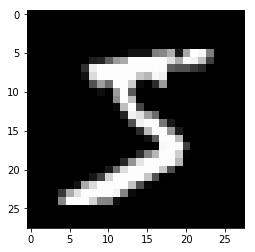

In [5]:
# select an image
img = X_train[0]

# show the image
plt.imshow(img, cmap='gray')
plt.show()

Notice anything about the images? For example, how many pixels are in each image?
    
    每張圖都是 28*28，但實際數字的大小好像不到 28*28。反而像 20*20 置中有黑色的邊框
    
Now that we can view the images, let's try also showing the true label alongside the image:

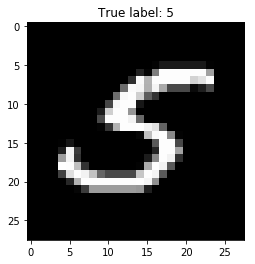

In [6]:
# select one of the images and its corresponding label
i = 403
img = X_train[i]
label = y_train[i]

# show the image and its label
plt.imshow(img, cmap='gray')
plt.title("True label: %d" % label)
plt.show()

**Logistic regression implemented in Keras**


Before moving onto models, we should pre-process the MNIST data:
1. reshape the MNIST images into 1D arrays (from 2D arrays)
2. normalize the MNIST images
3. convert the MNIST labels

In [7]:

# reshape the data: (n_samples, 28, 28) => (n_samples, 28*28)
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# convert data type and normalize the values (8-bit = 256 = 0...255)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# convert the class labels to 10-dimensional class arrays:
# 這邊就是上課說到 0~9 有大小差別的問題，所以轉成 bag of words
# - before: y_train = (n_samples, )
# - after: Y_train = (n_samples, 10)
#
Y_train = np_utils.to_categorical(y_train, 10)# keras 用 numpy 寫成的 function 
Y_test = np_utils.to_categorical(y_test, 10)# 詳情看 https://keras.io/utils/

#y_Train = np.eye(10)[y_train] #這樣寫有同樣的效果 identity matrix 第 y_train row
#print(y_Train[0])

In [8]:

print(y_train[0], Y_train[0])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
# create the model
model = Sequential()
model.add(Dense(10, input_dim=28*28, activation='softmax'))

# compile the model
#model.compile(loss='categorical_crossentropy',
#              optimizer='sgd',
#              metrics=['accuracy'])            
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])            


# train the model on data
model.fit(X_train, Y_train,
          batch_size=128, # how many images to look at together
          nb_epoch=20,       # how many epochs to run before stopping
          #舊版寫法，新版 epochs
          verbose=1,
          validation_data=(X_test, Y_test)
         )

# test the trained model on the testing set
score = model.evaluate(X_test, Y_test, verbose=0) 

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20


/home/tom/anaconda3/envs/testJ/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


60000/60000 [==============================] - 1s 15us/step - loss: 0.0888 - acc: 0.1790 - val_loss: 0.0873 - val_acc: 0.2312
Epoch 2/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.0857 - acc: 0.2763 - val_loss: 0.0841 - val_acc: 0.3158
Epoch 3/20
60000/60000 [==============================] - 1s 10us/step - loss: 0.0824 - acc: 0.3466 - val_loss: 0.0807 - val_acc: 0.3849
Epoch 4/20
60000/60000 [==============================] - 1s 11us/step - loss: 0.0790 - acc: 0.4072 - val_loss: 0.0772 - val_acc: 0.4389
Epoch 5/20
60000/60000 [==============================] - 1s 10us/step - loss: 0.0757 - acc: 0.4660 - val_loss: 0.0739 - val_acc: 0.5001
Epoch 6/20
60000/60000 [==============================] - 1s 10us/step - loss: 0.0724 - acc: 0.5306 - val_loss: 0.0706 - val_acc: 0.5657
Epoch 7/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.0692 - acc: 0.5865 - val_loss: 0.0674 - val_acc: 0.6070
Epoch 8/20
60000/60000 [==============================

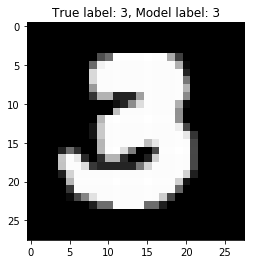

In [10]:
# select an image
i = 200
img = X_test[i].reshape(28, 28)

# prepare the image to be used in the model
x = img.reshape(-1, 28*28)

# get the model output
model_label = np.argmax( model.predict(x) )

# get the true label
true_label = np.argmax(Y_test[i])

plt.imshow(img, cmap='gray')
plt.title('True label: {0}, Model label: {1}'.format(true_label, model_label))
plt.show()

**Multilayer Perceptron (MLP)**

Next we'll try out a "classic" neural network model (i.e. not a deep neural network).

A Multilayer Perceptron (aka an Artificial Neural Network) is made up of an input layer, one or more hidden layers, and an output layer

In [11]:
# create the MLP model
model = Sequential()
# implicit input layer 28*28 node 
# with hidden layer 512 node
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu')) # hidden layers
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax')) # output layer

# print a summary of the model topology
print( model.summary() )

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          batch_size=128,
          epochs=2,
          verbose=1,
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 s

**Discussion**
**Question 1:** How did the accuracy of the MLP model compare to the Logistic Regression model?

    0.7872 與 0.9763 ，MLP 準確度高很多

**Question 2:** Can you identify any other differences between the MLP and Logistic Regression models? *Hint:* Was there a difference in the code complexity and/or training time?

    MLP -> 多層的 Logistic Regression，2 epoch 300 us, vs 20 epoch 20*30 us

**Convolutional Neural Network (CNN)**
Now let's try out first deep neural network: a Convolutional Neural Network (CNN).

The CNN is made up of a few core layer types, which get stacked on top of each other:
- convolutional layers (2D)
- max pooling layers (2D)
- fully connected (aka densely connected) layers (same type as in the MLP model)


First, we need to perform pre-processing on the MNIST data, but with a slight tweak from the previous examples:

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)


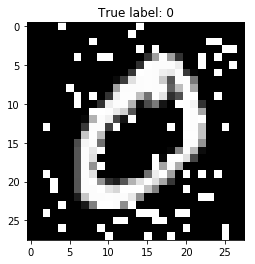

In [12]:
# load the data again (to be safe)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

"""
    Adding noise to image
"""
import random 

print(X_train.shape)
print(X_test.shape)

# 10%, 20%, 40%
img_size = 28*28

X_train_10 = np.zeros((60000, 28*28))
X_test_10 = np.zeros((10000, 28*28))
X_train_20 = np.zeros((60000, 28*28))
X_test_20 = np.zeros((10000, 28*28))
X_train_40 = np.zeros((60000, 28*28))
X_test_40 = np.zeros((10000, 28*28))

for i in range(len(X_train)): 
    ran_seq = random.sample([n for n in range(img_size)], np.int(img_size* 0.1)) 
    ran_seq2 = random.sample([n for n in range(img_size)], np.int(img_size* 0.2)) 
    ran_seq3 = random.sample([n for n in range(img_size)], np.int(img_size* 0.4)) 
    X_train_10[i] = X_train[i].reshape(-1, img_size) 
    X_train_20[i] = np.copy(X_train_10[i])
    X_train_40[i] = np.copy(X_train_10[i])
    X_train_10[i, ran_seq] = 255
    X_train_20[i, ran_seq2] = 255
    X_train_40[i, ran_seq3] = 255

for i in range(len(X_test)):
    ran_seq = random.sample([n for n in range(img_size)], np.int(img_size* 0.1)) 
    ran_seq2 = random.sample([n for n in range(img_size)], np.int(img_size* 0.2)) 
    ran_seq3 = random.sample([n for n in range(img_size)], np.int(img_size* 0.4)) 
    X_test_10[i] = X_test[i].reshape(-1, img_size) 
    X_test_20[i] = np.copy(X_test_10[i])
    X_test_40[i] = np.copy(X_test_10[i])
    X_test_10[i, ran_seq] = 255
    X_test_20[i, ran_seq2] = 255
    X_test_40[i, ran_seq3] = 255
    
print(X_train_10.shape)
#print(x[1])

img = X_train_10[1].reshape(28, 28)
label = y_train[1]

# show the image and its label
plt.imshow(img, cmap='gray')
plt.title("True label: %d" % label)
plt.show()



(60000, 28, 28, 1)


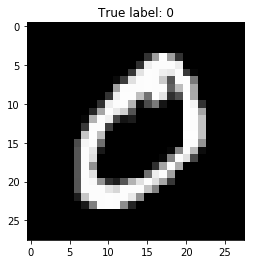

In [13]:
# reshape the data based on what backend is in use (TensorFlow or Thean)
if keras_backend.image_data_format() == 'channels_first': #Thean
    X_train = X_train.reshape(-1, 1, 28, 28)
    X_test = X_test.reshape(-1, 1, 28, 28)
else: # TensorFlow
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)
    X_train_10 = X_train_10.reshape(-1, 28, 28, 1)
    X_train_20 = X_train_20.reshape(-1, 28, 28, 1)
    X_train_40 = X_train_40.reshape(-1, 28, 28, 1)
    X_test_10 = X_test_10.reshape(-1, 28, 28, 1)
    X_test_20 = X_test_20.reshape(-1, 28, 28, 1)
    X_test_40 = X_test_40.reshape(-1, 28, 28, 1)

print(X_train.shape)

img = X_train[1, :, :, 0]
label = y_train[1]

# show the image and its label
plt.imshow(img, cmap='gray')
plt.title("True label: %d" % label)
plt.show()


# convert data type and normalize the values (8-bit = 256 = 0...255)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train_10 = X_train_10.astype('float32') / 255
X_train_20 = X_train_20.astype('float32') / 255
X_train_40 = X_train_40.astype('float32') / 255
X_test_10 = X_test_10.astype('float32') / 255
X_test_20 = X_test_20.astype('float32') / 255
X_test_40 = X_test_40.astype('float32') / 255

# convert the class labels to 10-dimensional class arrays:
# - before: y_train = (n_samples, )
# - after: Y_train = (n_samples, 10)
#
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [14]:
# create the CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)
                ))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adadelta(),
              metrics=['accuracy'])


print("== origin ==")
model.fit(X_train, Y_train,
          batch_size=128,
          epochs=2,
          verbose=1,
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


print("\n== 10% ==")
model.fit(X_train_10, Y_train,
          batch_size=128,
          epochs=2,
          verbose=1,
          validation_data=(X_test_10, Y_test))

score = model.evaluate(X_train_10, Y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_test_10, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


print("\n== 20% ==")
model.fit(X_train_20, Y_train,
          batch_size=128,
          epochs=2,
          verbose=1,
          validation_data=(X_test_20, Y_test))

score = model.evaluate(X_train_20, Y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_test_20, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


print("\n== 40% ==")
model.fit(X_train_40, Y_train,
          batch_size=128,
          epochs=2,
          verbose=1,
          validation_data=(X_test_40, Y_test))

score = model.evaluate(X_train_40, Y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_test_40, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

== origin ==
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 42s 703us/step - loss: 0.2629 - acc: 0.9202 - val_loss: 0.0529 - val_acc: 0.9830
Epoch 2/2
60000/60000 [==============================] - 42s 696us/step - loss: 0.0887 - acc: 0.9737 - val_loss: 0.0380 - val_acc: 0.9876
Test loss: 0.037965699059228065
Test accuracy: 0.9876

== 10% ==
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 42s 707us/step - loss: 0.1016 - acc: 0.9688 - val_loss: 0.0495 - val_acc: 0.9836
Epoch 2/2
60000/60000 [==============================] - 43s 717us/step - loss: 0.0758 - acc: 0.9765 - val_loss: 0.0456 - val_acc: 0.9843
Train loss: 0.03513833570364708
Train accuracy: 0.9897
Test loss: 0.04555246528948192
Test accuracy: 0.9843

== 20% ==
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 44s 731us/step - loss: 0.0992 - acc: 0.9695 

**Discussion**
**Question 1:** How did the accuracy of the CNN compare to the MLP and Logistic Regression models?
    
    CNN:0.9864 > MLP:0.9763 > Logistic:0.7872
    
**Question 2:** Can you identify any other differences between the three models?

    CNN 多了 Conv2D, pooling 